In [244]:
import pandas as pd
import numpy as np

In [245]:
df = pd.read_csv('Housing.csv')
df
from sklearn.preprocessing import StandardScaler, LabelEncoder
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=df[column].fillna(df[column].mode()[0])
        df[column]=LabelEncoder().fit_transform(df[column])
    else:
        df[column] = df[column].fillna(df[column].median()) 

In [246]:
df_copy = df[['mainroad','guestroom','hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']]
df_copy


,mainroad,guestroom,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,1,1,0
1,1,0,0,1,0,0
2,1,0,0,0,1,1
3,1,0,0,1,1,0
4,1,1,0,1,0,0
...,...,...,...,...,...,...
540,1,0,0,0,0,2
541,0,0,0,0,0,1
542,1,0,0,0,0,2
543,0,0,0,0,0,0


In [247]:
## Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df[['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [263]:
label_encoders


{'mainroad': LabelEncoder(),
 'guestroom': LabelEncoder(),
 'basement': LabelEncoder(),
 'hotwaterheating': LabelEncoder(),
 'airconditioning': LabelEncoder(),
 'prefarea': LabelEncoder(),
 'furnishingstatus': LabelEncoder()}

In [249]:
y = df['price']
X= df.drop('price', axis =1)
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [250]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,y,test_size= 0.2,random_state=42)
#X_train
print(y_test)

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64


In [251]:
# Naive Baise Classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing= 1e-9) ## variance smothning  .000000001
model.fit(X_train,y_train)

GaussianNB()

In [252]:
y_prediction = model.predict(X_test)
y_prediction

array([3570000, 6160000, 3605000, 4130000, 2380000, 2730000, 4480000,
       5460000, 3150000, 2275000, 6300000, 1750000, 3115000, 4410000,
       2450000, 3150000, 2380000, 7070000, 4795000, 3675000, 4830000,
       6020000, 1750000, 4550000, 4795000, 6300000, 2450000, 3885000,
       4760000, 2380000, 6160000, 2100000, 6195000, 2485000, 2870000,
       7070000, 4970000, 6160000, 3115000, 3885000, 4403000, 2653000,
       6160000, 4585000, 3675000, 7070000, 7560000, 4480000, 2730000,
       2590000, 7700000, 2100000, 3710000, 3360000, 2450000, 2275000,
       7420000, 2485000, 4130000, 1750000, 2590000, 3570000, 4480000,
       6160000, 4403000, 3080000, 6083000, 2450000, 2730000, 6475000,
       3990000, 4403000, 3710000, 6300000, 7070000, 9240000, 4403000,
       5110000, 7070000, 3500000, 5740000, 4403000, 6020000, 5110000,
       2485000, 7420000, 2380000, 4165000, 5740000, 4970000, 4410000,
       6020000, 3675000, 3360000, 6083000, 5460000, 5460000, 7350000,
       4403000, 3850

In [253]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)
print(f"Mean Squared Error:{mse} ")
print(f"R^2:{r2} ")

Mean Squared Error:3200785754587.156 
R^2:0.36675412575533206 


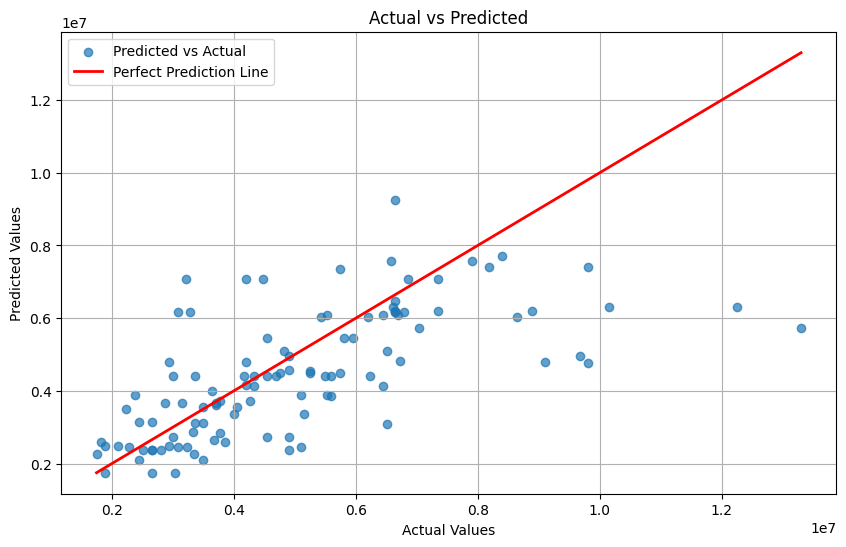

In [254]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_prediction, alpha= 0.7, label = 'Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color  = 'red', linewidth =2, label = 'Perfect Prediction Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

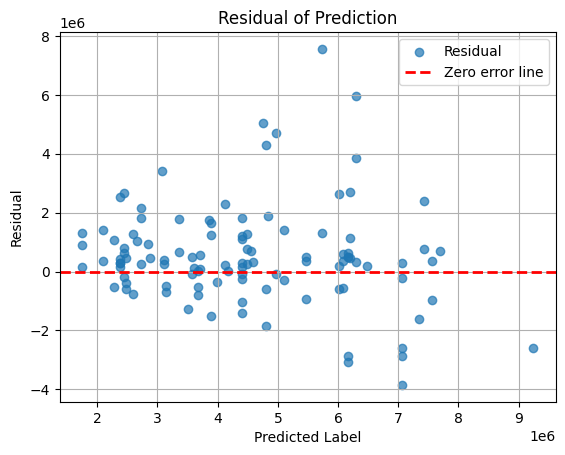

In [255]:
# Residual Plot
residual = y_test - y_prediction
plt.scatter(y_prediction, residual, alpha= 0.7, label = 'Residual')
plt.axhline(y = 0, color = 'red', linewidth =2, linestyle = '--', label = 'Zero error line')
plt.title('Residual of Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('Residual')
plt.legend()
plt.grid()
plt.show()

##  Re Analysis of Naive Baise with Optimal Variance

In [256]:
import numpy as np
smoothing_values = np.logspace(-20,-1,100)

In [257]:
# Naive Baise Classifier
from sklearn.naive_bayes import GaussianNB
mse_values = []
r2_values = []
for value in smoothing_values:
    model = GaussianNB(var_smoothing= value)
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    mse_values.append(mean_absolute_error(y_test, y_prediction))
    r2_values.append(r2_score(y_test,y_prediction))

In [258]:
mse_values

[1235628.4403669725,
 1231133.0275229358,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1195169.7247706421,
 1205444.9541284405,
 1205444.9541284405,
 1205444.9541284405,
 1205444.9541284405,
 1205444.9541284405,
 1205444.9541284405,
 1205444.9541284405,
 1205444.9541284405,
 1205444.9541284405,
 1205444.9541284405,
 1205444.9541284405,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394495412,
 1200307.3394

In [259]:
r2_values

[0.2897052701198827,
 0.29070137110175087,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.38943098717067703,
 0.3675167655695749,
 0.3675167655695749,
 0.3675167655695749,
 0.3675167655695749,
 0.3675167655695749,
 0.3675167655695749,
 0.3675167655695749,
 0.3675167655695749,
 0.3675167655695749,
 0.3675167655695749,
 0.3675167655695749,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.3759124738453219,
 0.375912473

In [260]:
best_index = np.argmin(mse_values)
best_smoothing = smoothing_values[best_index]
print(f"Best var_smoothing:{best_smoothing}")
print(f"Corresponding MSE:{mse_values[best_index]}")
print(f"Corresponding R2:{r2_values[best_index]}")

Best var_smoothing:0.1
Corresponding MSE:1151114.6788990826
Corresponding R2:0.41762206795895185


After analysis  with 100 smoothing vaslues the r2 square values not exceed from .41 which means that Naive Baised Model is not fir for this dataset  so we need to think for another models 